In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib as mpl
import matplotlib.pyplot as plt
import sympy
from sympy import simplify, Function, Derivative
from sympy import symbols, pprint
from sympy import sin, cos, asin, acos, pi, Abs
from sympy import Matrix, diff
from sympy import lambdify
from sympy import solve
from IPython.display import display
sympy.init_printing(use_latex=True);


In [2]:
%qtconsole

## 1) Simulating Dynamical Systems

## 1. Constant Torque Pendulum

In [3]:
def pendulum(t, state, l, q):
    theta, thetadot = state
    dydt = [thetadot, q-(g/l)*(np.sin(theta))]
    return dydt

In [4]:
L = 1
g = 9.8
Q = [0,3.5,7]

dt = 0.001
time = np.linspace(0,10,int(10/dt))

<Figure size 640x480 with 0 Axes>

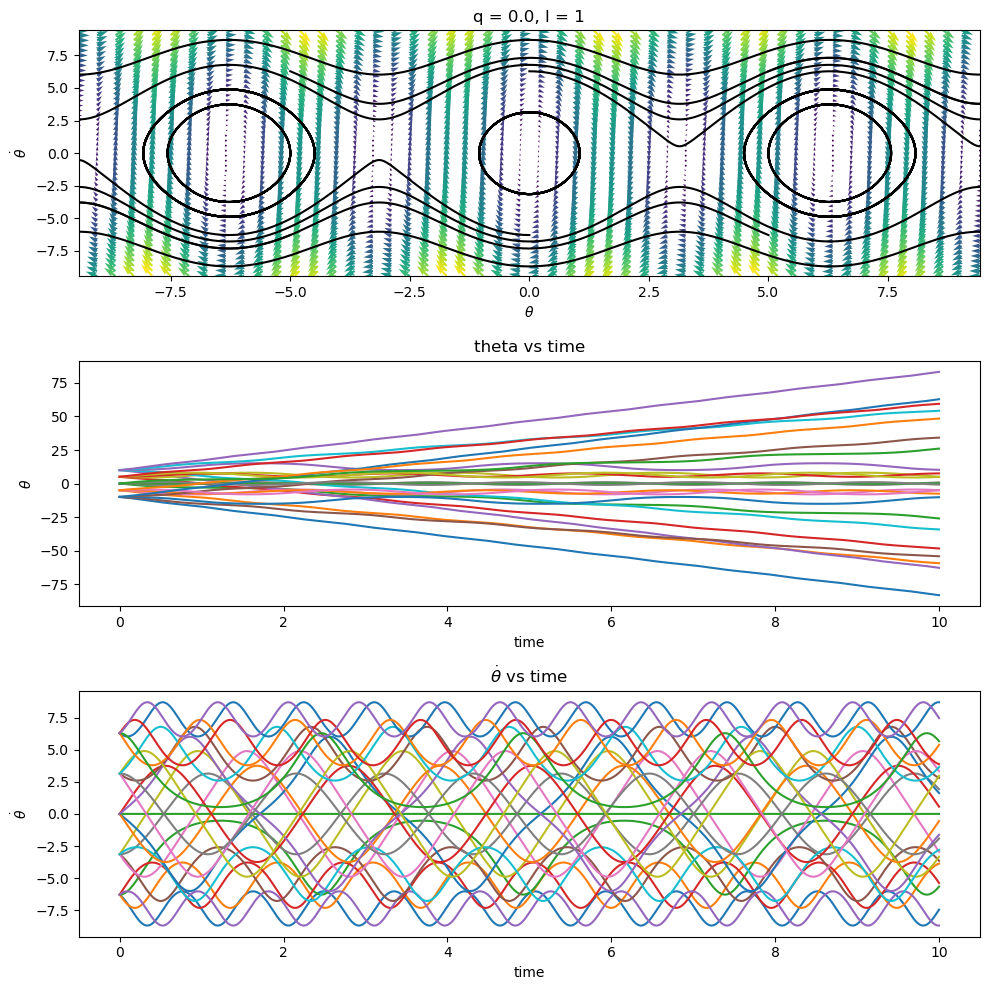

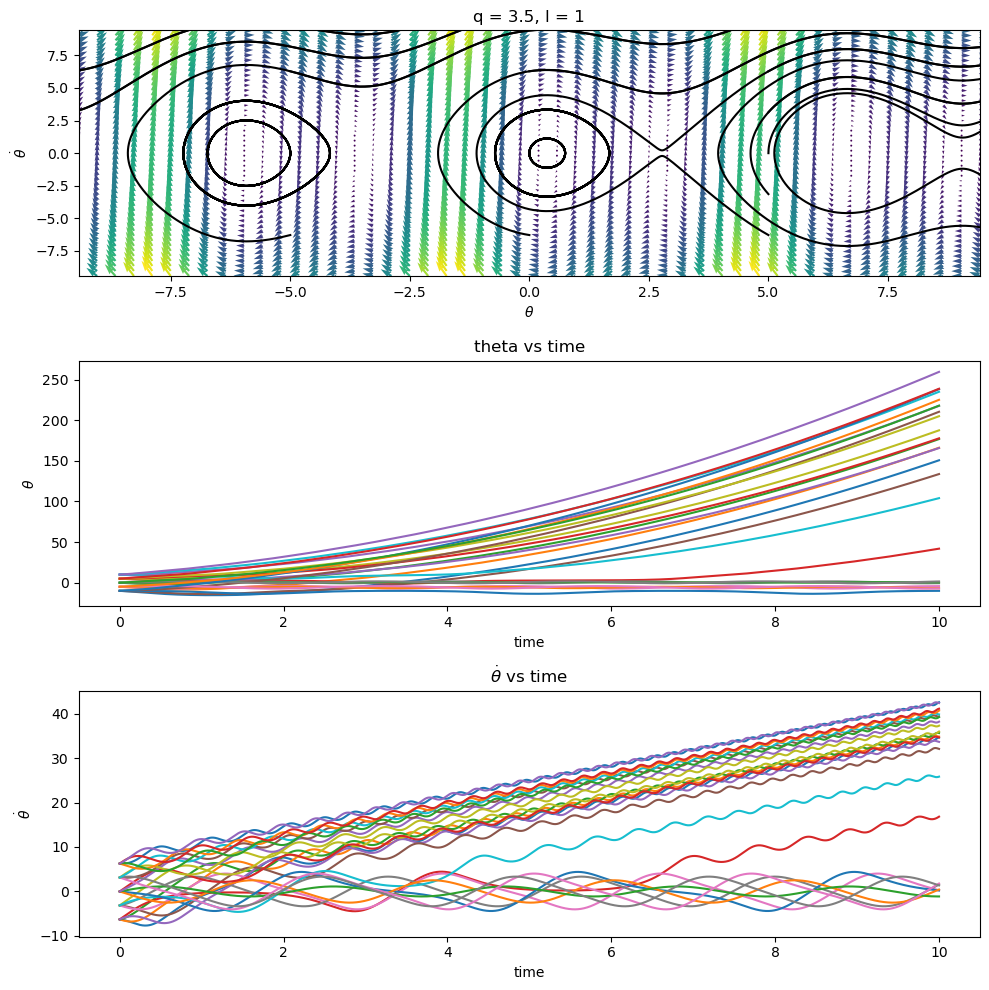

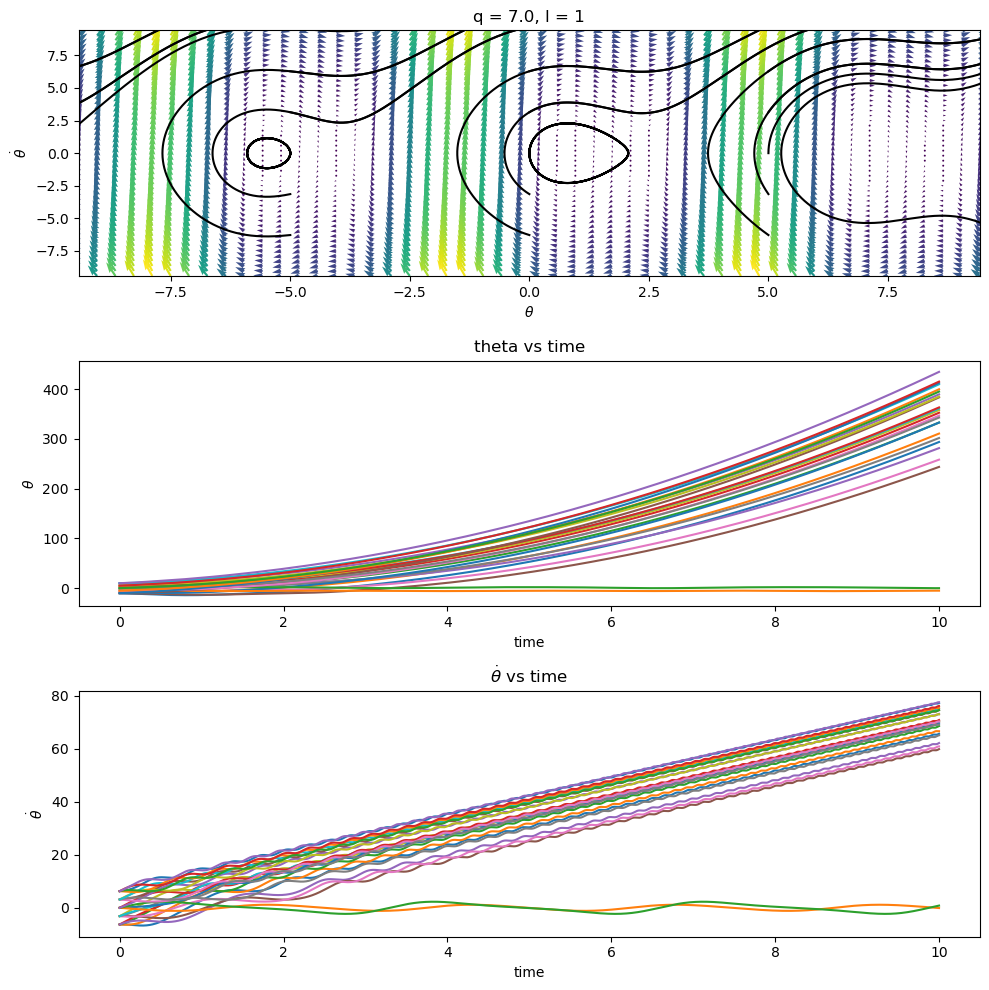

In [5]:
theta = np.linspace(-10, 10, 5)
dtheta_dt = np.linspace(-2*np.pi, 2*np.pi, 5)
[theta_start, dtheta_start] = np.meshgrid(theta, 
                                          dtheta_dt) 

for i in range(len(Q)):
    numpoints = 50
    rng = 3*np.pi

    [x1_vf, x2_vf] = np.meshgrid(np.linspace(-rng,rng,numpoints), 
                                 np.linspace(-rng,rng,numpoints)) 

    dynamics = pendulum(0, [x1_vf, x2_vf], L, Q[i])
    norm = dynamics[0]**2 + dynamics[1]**2

    plt.figure(i)
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (10,10))
    ax1.quiver(x1_vf, x2_vf, dynamics[0], dynamics[1], norm)

    for init in zip(theta_start.reshape(1,25)[0], dtheta_start.reshape(1,25)[0]):
        # print(init)
        sol = solve_ivp(lambda t, y: pendulum(t, y, L, Q[i]), 
                        [0,10], init, 
                        t_eval = time, 
                        rtol=1e-8, atol = 1e-8)
        ax1.plot(sol.y[0,:], sol.y[1,:], 'k')
        ax2.plot(sol.t, sol.y[0,:])
        ax3.plot(sol.t, sol.y[1,:])
        ax1.axis([-10, 10, -7.5, 7.5])    

    ax1.set_xlabel(r'$\theta$')
    ax1.set_ylabel(r'$\dot{\theta}$')
    ax1.set_title('q = %1.1f, ' % Q[i]+ 'l = %i' % L)
    ax1.axis([-rng, rng, -rng, rng])
    
    ax2.set_ylabel('$\\theta$')
    ax2.set_xlabel('time')
    ax2.set_title('theta vs time')
    
    ax3.set_ylabel(r'$\dot{\theta}$')
    ax3.set_xlabel('time')
    ax3.set_title(r'$\dot{\theta}$ vs time')
    fig.tight_layout()

Jacobian: 


⎡    0       1⎤
⎢             ⎥
⎢-g⋅cos(θ)    ⎥
⎢──────────  0⎥
⎣    l        ⎦

Solution:(theta, omega)=  (pi - asin(l*q/g), 0)


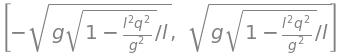

Solution:(theta, omega)=  (asin(l*q/g), 0)


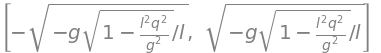

In [6]:
(t, 
 theta, 
 omega, 
 g, 
 l,
 q) = symbols("""t, 
                 theta,
                 omega
                 g, 
                 l,
                 q""" , real = True)

g_dynamics = Matrix([[omega], 
             [q-g/l*sin(theta)]])
g_J = g_dynamics.jacobian([theta, omega])
print('Jacobian: ')
display(g_J)
a = solve(g_dynamics, [theta, omega])
for j in range(len(a[0])):
    A = g_J.subs([(theta, a[j][0]), (omega, a[j][1])])
    print('Solution:(theta, omega)= ', a[j])
    display(list(A.eigenvals().keys()))




From the above solution 1 has positive real part for one of the eigenvalues which makes it unstable.
Solution 2 has one negative eigenvalue and another imaginary eigenvalue which is marginally stable.

## 2. Van der Pol oscillator

In [7]:
def VanDerPol(t, state, k, mew):
    x, xdot = state
    dxdt = [xdot, -k*x + mew*(1-x**2)*xdot]
    return dxdt

In [8]:
u = [-1, 1]
k = 2
dt = 0.001
time = np.linspace(0,10,int(10/dt))

<Figure size 640x480 with 0 Axes>

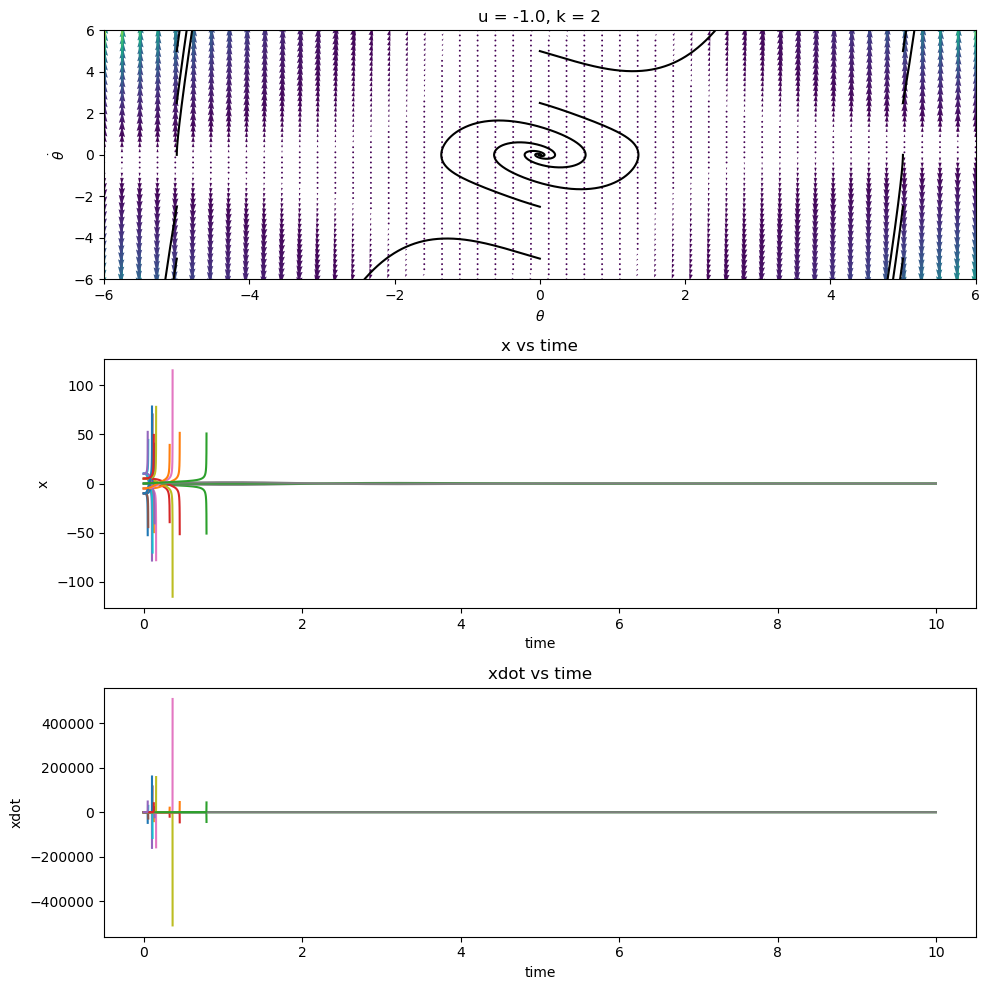

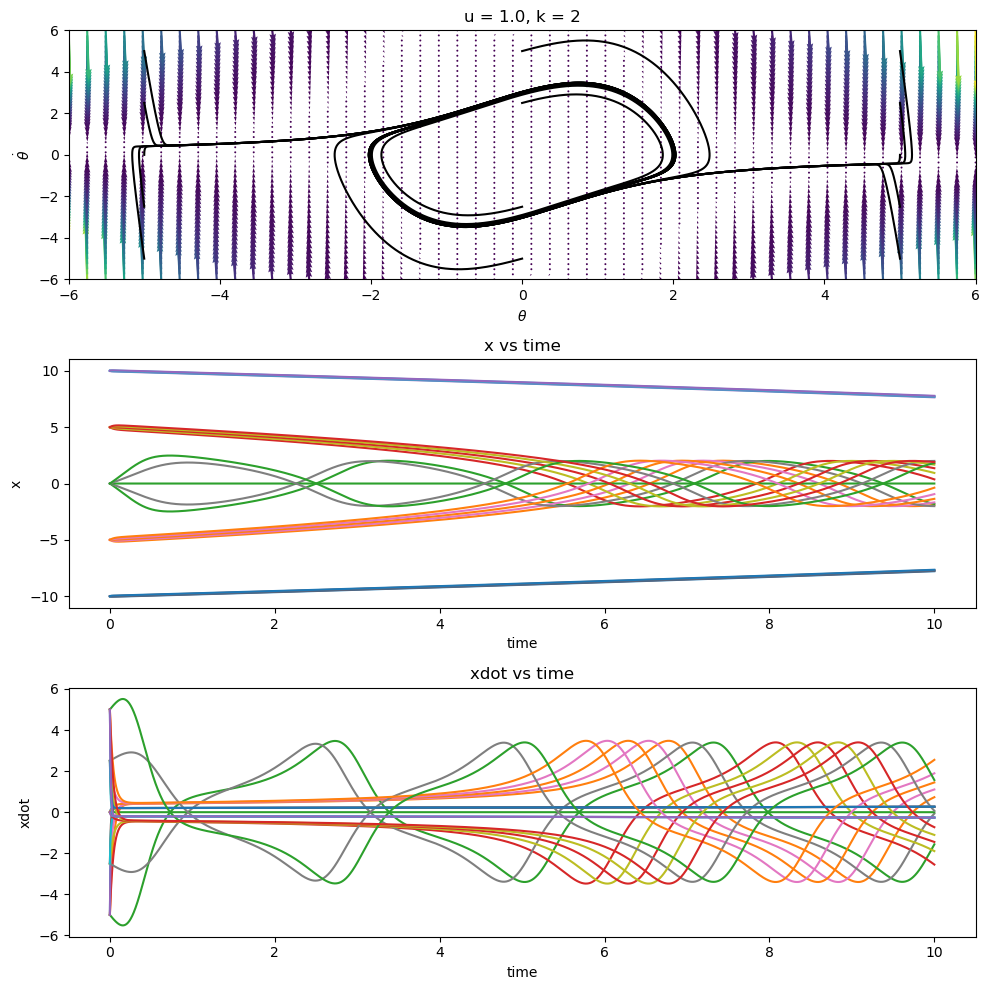

In [9]:
x = np.linspace(-10, 10, 5)
dx_dt = np.linspace(-5, 5, 5)
[x_start, dx_start] = np.meshgrid(x,dx_dt) 

for i in range(len(u)):
    numpoints = 50
    rng = 6

    [x1_vf, x2_vf] = np.meshgrid(np.linspace(-rng,rng,numpoints), 
                                 np.linspace(-rng,rng,numpoints)) 

    dynamics = VanDerPol(0, [x1_vf, x2_vf], k, u[i])
    norm = dynamics[0]**2 + dynamics[1]**2

    plt.figure(i)
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (10,10))
    ax1.quiver(x1_vf, x2_vf, dynamics[0], dynamics[1], norm)

    for init in zip(x_start.reshape(1,25)[0], dx_start.reshape(1,25)[0]):
        # print(init)
        sol = solve_ivp(lambda t, y: VanDerPol(t, y, k, u[i]), 
                        [0,10], init, 
                        t_eval = time, 
                        rtol=1e-8, atol = 1e-8)
        ax1.plot(sol.y[0,:], sol.y[1,:], 'k')
        ax2.plot(sol.t, sol.y[0,:])
        ax3.plot(sol.t, sol.y[1,:])
        ax1.axis([-10, 10, -7.5, 7.5])    

    ax1.set_xlabel(r'$\theta$')
    ax1.set_ylabel(r'$\dot{\theta}$')
    ax1.set_title('u = %1.1f, ' % u[i]+ 'k = %i' % k)
    ax1.axis([-rng, rng, -rng, rng])
    
    ax2.set_ylabel('x')
    ax2.set_xlabel('time')
    ax2.set_title('x vs time')
    
    ax3.set_ylabel('xdot')
    ax3.set_xlabel('time')
    ax3.set_title('xdot vs time')
    fig.tight_layout()

In [10]:
(t, 
 x, 
 xdot, 
 k, 
 mew) = symbols("""t, 
                 x,
                 xdot,
                 k, 
                 mu""" , real = True)
x = Function("x")(t)
xdot = Derivative(x,t)
g_dynamics = Matrix([[xdot], 
             [-k*x+mew*(1-x**2)*xdot]])
g_J = g_dynamics.jacobian([x, xdot])
print('Jacobian: ')
display(g_J)
a = solve(g_dynamics, [x, xdot])
A = g_J.subs([(x, a[0][0]), (xdot, a[0][1])])
print('Solution: ', a)
display(list(A.eigenvals().keys()))

Jacobian: 


⎡          0                   1      ⎤
⎢                                     ⎥
⎢              d           ⎛     2   ⎞⎥
⎢-k - 2⋅μ⋅x(t)⋅──(x(t))  μ⋅⎝1 - x (t)⎠⎥
⎣              dt                     ⎦

Solution:  [(0, 0)]


The real parts of the eigenvalues are positive so the system is unstable

## 3. Hopt Oscillator

In [11]:
def Hopf(t, state, w, mu):
    x1, x2 = state
    dxdt = [(mu - (x1**2+x2**2))*x1 + w*x2,
            (mu - (x1**2+x2**2))*x2 - w*x1]
    return dxdt

In [12]:
u = 1
w = 1
dt = 0.001
time = np.linspace(0,10,int(10/dt))

<Figure size 640x480 with 0 Axes>

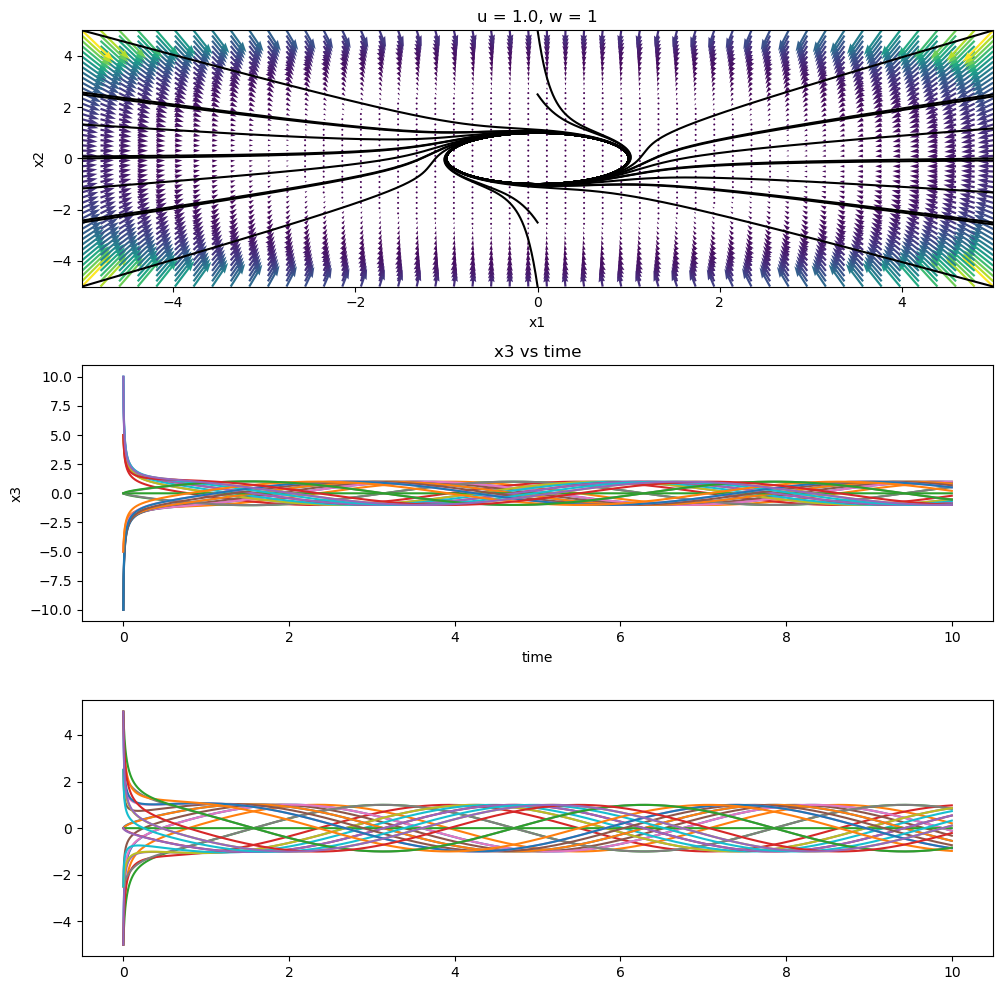

In [13]:
x1 = np.linspace(-10, 10, 5)
x2 = np.linspace(-10, 10, 5)
[x1_start, x2_start] = np.meshgrid(x1,x2) 

numpoints = 50
rng = 5

[x1_vf, x2_vf] = np.meshgrid(np.linspace(-rng,rng,numpoints), 
                             np.linspace(-rng,rng,numpoints)) 

dynamics = Hopf(0, [x1_vf, x2_vf], w, u)
norm = dynamics[0]**2 + dynamics[1]**2

plt.figure(1)
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (10,10))
ax1.quiver(x1_vf, x2_vf, dynamics[0], dynamics[1], norm)

for init in zip(x_start.reshape(1,25)[0], dx_start.reshape(1,25)[0]):
    # print(init)
    sol = solve_ivp(lambda t, y: Hopf(t, y, w, u), 
                    [0,10], init, 
                    t_eval = time, 
                    rtol=1e-8, atol = 1e-8)
    ax1.plot(sol.y[0,:], sol.y[1,:], 'k')
    ax2.plot(sol.t, sol.y[0,:])
    ax3.plot(sol.t, sol.y[1,:])
    ax1.axis([-10, 10, -7.5, 7.5])    

ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_title('u = %1.1f, ' % u+ 'w = %i' % w)
ax1.axis([-rng, rng, -rng, rng])

ax2.set_ylabel('x1')
ax2.set_xlabel('time')
ax2.set_title('x1 vs time')

ax2.set_ylabel('x3')
ax2.set_xlabel('time')
ax2.set_title('x3 vs time')
fig.tight_layout()

In [14]:
(t, 
 x1, 
 x2, 
 omega, 
 mu) = symbols("""t, 
                 x1,
                 x2,
                 omega, 
                 mu""" , real = True)
g_dynamics = Matrix([[(mu - (x1**2+x2**2))*x1 + omega*x2], 
             [(mu - (x1**2+x2**2))*x2 - omega*x1]])
g_J = g_dynamics.jacobian([x1, x2])
print('Jacobian: ')
display(g_J)
a = solve(g_dynamics, [x1, x2])
for j in range(len(a)):
    A = g_J.subs([(x1, a[j][0]), (x2, a[j][1])])
    print('Solution: ', a[j])
    display(list(A.eigenvals().keys()))

Jacobian: 


⎡        2     2                 ⎤
⎢μ - 3⋅x₁  - x₂     ω - 2⋅x₁⋅x₂  ⎥
⎢                                ⎥
⎢                       2       2⎥
⎣ -ω - 2⋅x₁⋅x₂    μ - x₁  - 3⋅x₂ ⎦

Solution:  (0, 0)


Solution1: Based on the eigenvalues if mu and omega are both positive then the system is unstable but if mu is negative than the system is stable.

## 4. Switch-forced oscillator

In [15]:
def sfo(t, state, epsilon):
    x, xdot = state
    if (x > 0).all():
        dxdt = [xdot, 10-2*epsilon*xdot-x]
    else:
        dxdt = [xdot, -10-2*epsilon*xdot-x]
    return dxdt

In [16]:
e = 0.2
dt = 0.001
time = np.linspace(0,10,int(10/dt))

<Figure size 640x480 with 0 Axes>

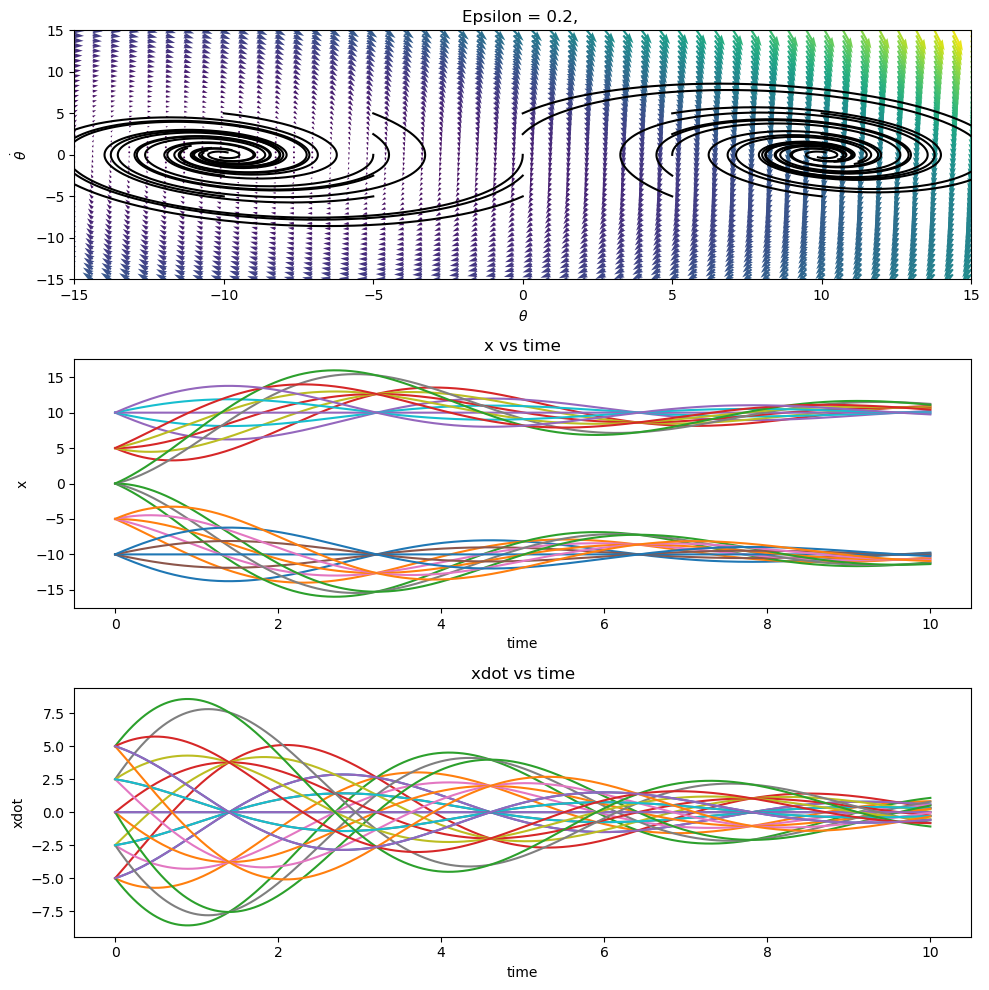

In [17]:
X = np.linspace(-10, 10, 5)
dX_dt = np.linspace(-5, 5, 5)
[X_start, dX_start] = np.meshgrid(x,dx_dt) 

numpoints = 50
rng = 15

[x1_vf, x2_vf] = np.meshgrid(np.linspace(-rng,rng,numpoints), 
                             np.linspace(-rng,rng,numpoints)) 

dynamics = sfo(0, [x1_vf, x2_vf], e)
norm = dynamics[0]**2 + dynamics[1]**2

plt.figure(i)
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (10,10))
ax1.quiver(x1_vf, x2_vf, dynamics[0], dynamics[1], norm)

for init in zip(x_start.reshape(1,25)[0], dx_start.reshape(1,25)[0]):
    # print(init)
    sol = solve_ivp(lambda t, y: sfo(t, y, e), 
                    [0,10], init, 
                    t_eval = time, 
                    rtol=1e-8, atol = 1e-8)
    ax1.plot(sol.y[0,:], sol.y[1,:], 'k')
    ax2.plot(sol.t, sol.y[0,:])
    ax3.plot(sol.t, sol.y[1,:])
    ax1.axis([-10, 10, -7.5, 7.5])    

ax1.set_xlabel(r'$\theta$')
ax1.set_ylabel(r'$\dot{\theta}$')
ax1.set_title('Epsilon = %1.1f, ' % e)
ax1.axis([-rng, rng, -rng, rng])

ax2.set_ylabel('x')
ax2.set_xlabel('time')
ax2.set_title('x vs time')

ax3.set_ylabel('xdot')
ax3.set_xlabel('time')
ax3.set_title('xdot vs time')
fig.tight_layout()

In [18]:
(t, 
 x, 
 xdot, 
 epsilon, 
 F) = symbols("""t, 
                 x,
                 xdot,
                 epsilon, 
                 F""" , real = True)
x = Function("x")(t)
xdot = Derivative(x,t)
g_dynamics = Matrix([[xdot], 
             [F-2*epsilon*xdot-x]])
g_J = g_dynamics.jacobian([x, xdot])
print('Jacobian: ')
print(g_J)
a = solve(g_dynamics, [x, xdot])
print('Solution: ', a)
print(list(g_J.eigenvals().keys()))

Jacobian: 
Matrix([[0, 1], [-1, -2*epsilon]])
Solution:  {x(t): F, Derivative(x(t), t): 0}
[-epsilon - sqrt((epsilon - 1)*(epsilon + 1)), -epsilon + sqrt((epsilon - 1)*(epsilon + 1))]


From the solution as long as epsilon is positive the system is stable

## 2) Stability of torque free rigid body

1.

In [19]:
(t, 
 omega_x, 
 omega_y, 
 omega_z,
 lambda_1,
 lambda_2,
 lambda_3) = symbols("""t, 
                 omega_x,
                 omega_y,
                 omega_z,
                 lambda_1,
                 lambda_2,
                 lambda_3""" , real = True)

omega_x = Function("omega_x")(t)
omega_y = Function("omega_y")(t)
omega_z = Function("omega_z")(t)

w = Matrix([[omega_x],
            [omega_y],
            [omega_z]])
w


⎡ωₓ(t) ⎤
⎢      ⎥
⎢ω_y(t)⎥
⎢      ⎥
⎣ω_z(t)⎦

2.

In [20]:
Ib = Matrix([[lambda_1, 0, 0],
             [0, lambda_2, 0],
             [0, 0, lambda_3]])
Ib


⎡λ₁  0   0 ⎤
⎢          ⎥
⎢0   λ₂  0 ⎥
⎢          ⎥
⎣0   0   λ₃⎦

3.

In [21]:
def cross_matrix(vec):
    return np.array([[0, -vec[2], vec[1]],
                    [vec[2], 0, -vec[0]],
                    [-vec[1], vec[0], 0]])

wdot = simplify(-Ib.inv()@(cross_matrix(w)@Ib@w))
wdot


⎡(λ₂ - λ₃)⋅ω_y(t)⋅ω_z(t)⎤
⎢───────────────────────⎥
⎢           λ₁          ⎥
⎢                       ⎥
⎢(-λ₁ + λ₃)⋅ωₓ(t)⋅ω_z(t)⎥
⎢───────────────────────⎥
⎢           λ₂          ⎥
⎢                       ⎥
⎢(λ₁ - λ₂)⋅ωₓ(t)⋅ω_y(t) ⎥
⎢────────────────────── ⎥
⎣          λ₃           ⎦

4.

In [22]:
fixed_points = solve(wdot, [omega_x, omega_y, omega_z])
fixed_points

5.

In [23]:
A = wdot.jacobian([omega_x, omega_y, omega_z])
A1 = simplify(A.subs([(omega_x, fixed_points[0][0]),
            (omega_y, fixed_points[0][1]),
            (omega_z, fixed_points[0][2])]))
display(A1)
A2 = simplify(A.subs([(omega_x, fixed_points[1][0]),
            (omega_y, fixed_points[1][1]),
            (omega_z, fixed_points[1][2])]))
display(A2)
A3 = simplify(A.subs([(omega_x, fixed_points[2][0]),
            (omega_y, fixed_points[2][1]),
            (omega_z, fixed_points[2][2])]))
display(A3)

⎡                   (λ₂ - λ₃)⋅ω_z(t)   ⎤
⎢        0          ────────────────  0⎥
⎢                          λ₁          ⎥
⎢                                      ⎥
⎢(-λ₁ + λ₃)⋅ω_z(t)                     ⎥
⎢─────────────────         0          0⎥
⎢        λ₂                            ⎥
⎢                                      ⎥
⎣        0                 0          0⎦

⎡                     (λ₂ - λ₃)⋅ω_y(t)⎤
⎢       0          0  ────────────────⎥
⎢                            λ₁       ⎥
⎢                                     ⎥
⎢       0          0         0        ⎥
⎢                                     ⎥
⎢(λ₁ - λ₂)⋅ω_y(t)                     ⎥
⎢────────────────  0         0        ⎥
⎣       λ₃                            ⎦

⎡0         0                0        ⎤
⎢                                    ⎥
⎢                    (-λ₁ + λ₃)⋅ωₓ(t)⎥
⎢0         0         ────────────────⎥
⎢                           λ₂       ⎥
⎢                                    ⎥
⎢   (λ₁ - λ₂)⋅ωₓ(t)                  ⎥
⎢0  ───────────────         0        ⎥
⎣          λ₃                        ⎦

6.

In [24]:
eigenvals1 = A1.eigenvals()
display(list(eigenvals1.keys()))
eigenvals2 = A2.eigenvals()
display(list(eigenvals2.keys()))
eigenvals3 = A3.eigenvals()
display(list(eigenvals3.keys()))

7.

In [25]:
print(A1.det())
print(A2.det())
print(A3.det())

0
0
0


When wx, wy, wz = 1 and lambda_x > lambda_y > lambda_z, the trace of the A1,A2,A3 matrices are all 0, and the det. of A1,A2,A3 = 0 so the fixed points are all hyperbolic

## 3) Phugoid Instability in Gliders and Birds

1.

Jacobian: 


⎡    -2⋅R⋅v       -cos(θ)⎤
⎢                        ⎥
⎢     2                  ⎥
⎢    v  - cos(θ)  sin(θ) ⎥
⎢2 - ───────────  ────── ⎥
⎢          2        v    ⎥
⎣         v              ⎦

Solution:  (-sqrt(cos(2*atan((sqrt(R**2 - u**2 + 1) - 1)/(R + u)))), -2*atan((sqrt(R**2 - u**2 + 1) - 1)/(R + u)))


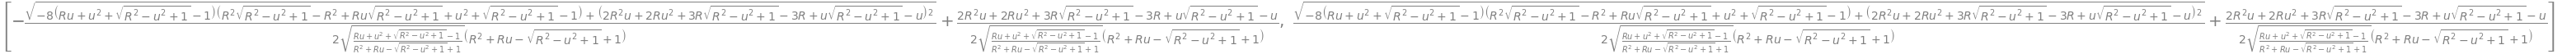

Solution:  (sqrt(cos(2*atan((sqrt(R**2 - u**2 + 1) - 1)/(R + u)))), -2*atan((sqrt(R**2 - u**2 + 1) - 1)/(R + u)))


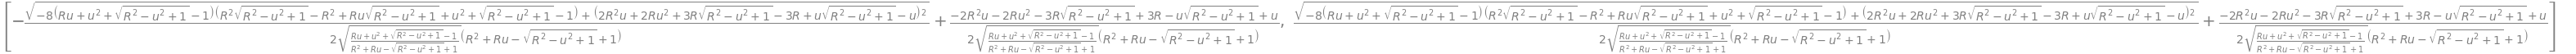

Solution:  (-sqrt(cos(2*atan((sqrt(R**2 - u**2 + 1) + 1)/(R + u)))), 2*atan((sqrt(R**2 - u**2 + 1) + 1)/(R + u)))


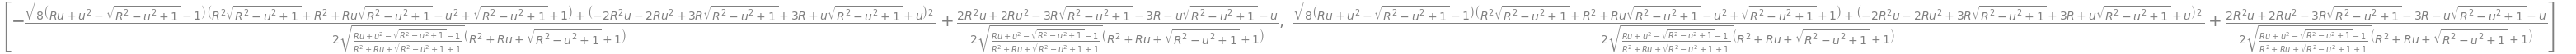

Solution:  (sqrt(cos(2*atan((sqrt(R**2 - u**2 + 1) + 1)/(R + u)))), 2*atan((sqrt(R**2 - u**2 + 1) + 1)/(R + u)))


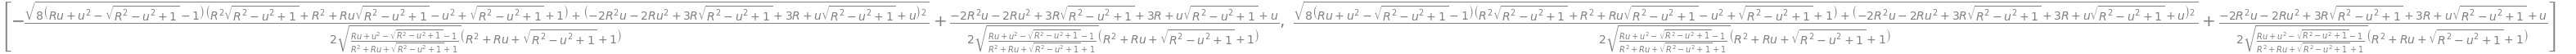

In [26]:

(t, 
 v, 
 theta, 
 R,
 u) = symbols("""t, 
                  v, 
                  theta, 
                  R,
                  u""" , real = True)

g_dynamics = Matrix([[-sin(theta)-R*v**2+u], 
             [(v**2-cos(theta))/v]])
g_J = g_dynamics.jacobian([v, theta])
print('Jacobian: ')
display(g_J)
a = solve(g_dynamics, [v, theta])
for j in range(len(a)):
    A = simplify(g_J.subs([(v, a[j][0]), (theta, a[j][1])]))
    print('Solution: ', a[j])
    display(list(A.eigenvals().keys()))

There were 4 fixed points total. Looking at the sign of each eigenvalue if R and u are positive then the first fixed point is unstable. The second fixed point is stable. The third fixed point is unstable and the fourth fixed point is stable.

2.

In [30]:
def phu(t, state, param):
    v, theta = state
    R, u = param
    dxdt = [-np.sin(theta)-R*v**2+u , (v**2-np.cos(theta))/v]
    return dxdt

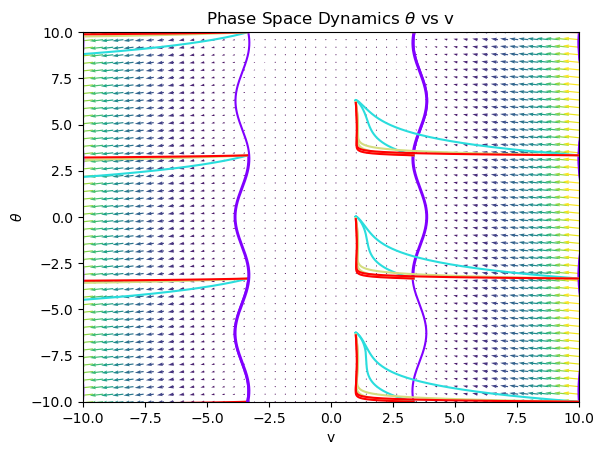

In [31]:
dt = 0.001
time = np.linspace(0,10,int(10/dt))
RaU = [[0,0], [1,1], [5,5], [10,10]]

v = np.linspace(-10, 10, 4)
theta = np.linspace(-10, 10, 4)
[v_start, theta_start] = np.meshgrid(v,theta) 

numpoints = 50
rng = 10

[x1_vf, x2_vf] = np.meshgrid(np.linspace(-rng,rng,numpoints), 
                             np.linspace(-rng,rng,numpoints)) 

dynamics = phu(0, [x1_vf, x2_vf], [1,1])
norm = dynamics[0]**2 + dynamics[1]**2

plt.figure(i)
plt.quiver(x1_vf, x2_vf, dynamics[0], dynamics[1], norm)

cmap = plt.get_cmap('rainbow', len(RaU))
for init in zip(v_start.reshape(1,len(v)*len(theta))[0], theta_start.reshape(1,len(v)*len(theta))[0]):
    # print(init)
    for randu in range(len(RaU)):
        sol = solve_ivp(lambda t, y: phu(t, y, RaU[randu]), 
                        [0,10], init, 
                        t_eval = time, 
                        rtol=1e-8, atol = 1e-8)
        plt.plot(sol.y[0,:], sol.y[1,:], color = cmap(randu))   

plt.xlabel('v')
plt.ylabel(r'$\theta$')
plt.title(r'Phase Space Dynamics $\theta$ vs v')
plt.axis([-rng, rng, -rng, rng])

The different colors represent different param R and u with the same initial conditions.

## 4) Reading

In the paper I enjoyed leaning about the SailMAV as its design seemed quite interesting. The use of the sail as wings was really smart and seemed to work quite well. As a side note the figures were really well done too which was nice. I am curious as to what practical requirements this would be useful for besides hobbying what kind of applications would require a robot to do this.